## 중소기업 통계 데이터 활용 정책 아이디어 공모전_01. EDA (중소기업실태조사)

### 00. 데이터 & 패키지 불러오기

In [1]:
import openpyxl
import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
MD_list = glob.glob('잠정MD*.xlsx')
MD_list

['잠정MD_서비스업.xlsx', '잠정MD_일반항목.xlsx', '잠정MD_제조업.xlsx']

In [3]:
md_ser = pd.read_excel(MD_list[2])
md_ser.head()

,GEN_A_01,GEN_A_02,GEN_A_03,GEN_A_04,GEN_A_06,GEN_A_07,GEN_A_08,GEN_A_09,GEN_A_10,GEN_A_11,...,SOC_A_32,SOC_A_33,SOC_A_34,SOC_A_35,SOC_A_36,SOC_A_37,SOC_A_38,SOC_A_39,SOC_A_40,WT
0,31,***,13,1,*** ** *****,*****,2,***,1,1974,...,7786,43200,29024,0,7882,0,0,0,1259941,64.348
1,11,***,15,1,*** ** *****,*****,2,***,2,1977,...,7909,0,29545,0,3369,0,0,0,927687,13.600
2,23,***,20,1,*** ** *****,*****,2,***,1,1981,...,11119,31905,20230,0,28324,0,0,0,1107661,19.375
3,11,***,33,3,*** ** *****,*****,1,***,1,1967,...,27,0,14250,0,27147,0,0,0,3206966,4.667
4,33,***,28,5,*** ** *****,*****,1,***,1,1952,...,10259,16800,80884,0,41579,0,0,0,13303629,17.000


In [4]:
#원하는 분야 선택

def extract_frame(col_name):
    col = pd.DataFrame()
    for i in md_ser.columns:
        if col_name in i:
            col= pd.concat([col,md_ser[i]],axis=1)
    return col

In [5]:
gen_a_03 = extract_frame('GEN_A_03')
gen_a_03

,GEN_A_03
0,13
1,15
2,20
3,33
4,28
...,...
7495,24
7496,25
7497,14
7498,26


In [6]:
gen_a_03['GEN_A_03'].unique()

array([13, 15, 20, 33, 28, 21, 17, 18, 14, 16, 24, 26, 32, 27, 10, 23, 29,
       31, 22, 30, 25, 11], dtype=int64)

18	인쇄, 기록매체 복제
27	의료, 정밀, 광학기기
33	기타제품

13	섬유제품
16	목재 및 나무제품
22	고무제품 및 플라스틱
31	기타운송장비

17	펄프 및 종이제품

11	음료
21	의료용물질 및 의약품
23	비금속광물제품

10	식료품
20	화학물질 및 화학제품
25	금속가공제품
26	전자, 컴퓨터, 영상, 통신장비
29	기타기계 및 장비
30	자동차 및 트레일러

14	의복 및 모피제품
15	가죽, 가방 및 신발
24	1차금속
28	전기장비
32	가구제조

단순히 매출로만 구분한 듯?
-> 업종별로 따로 볼 필요가 있다


#factory_col = [[18,27,33],[13,16,22,31],[17],[11,21,23],[10,20,25,26,29,30],[14,15,24,28,32]]


In [7]:
gen_a = extract_frame('GEN_A')
gen_e = extract_frame('GEN_E')
gen_ae = pd.concat([gen_a,gen_e],axis=1)
gen_ae

,GEN_A_01,GEN_A_02,GEN_A_03,GEN_A_04,GEN_A_06,GEN_A_07,GEN_A_08,GEN_A_09,GEN_A_10,GEN_A_11,...,GEN_E_04,GEN_E_05,GEN_E_06,GEN_E_09,GEN_E_10,GEN_E_11,GEN_E_12,GEN_E_13,GEN_E_14,GEN_E_15
0,31,***,13,1,*** ** *****,*****,2,***,1,1974,...,1817142,0,0,100,0.0,0.0,30.0,NaN,NaN,NaN
1,11,***,15,1,*** ** *****,*****,2,***,2,1977,...,12612,0,1248517,100,0.0,0.0,30.0,NaN,NaN,NaN
2,23,***,20,1,*** ** *****,*****,2,***,1,1981,...,1890674,0,0,100,0.0,0.0,30.0,NaN,NaN,NaN
3,11,***,33,3,*** ** *****,*****,1,***,1,1967,...,0,0,6526915,100,0.0,0.0,30.0,NaN,NaN,NaN
4,33,***,28,5,*** ** *****,*****,1,***,1,1952,...,14830884,0,0,50,0.0,50.0,30.0,NaN,30.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,34,***,24,3,*** ** *****,*****,1,***,1,1980,...,6340594,0,0,100,0.0,0.0,30.0,NaN,NaN,NaN
7496,31,***,25,6,*** ** *****,*****,1,***,1,1971,...,38693050,0,0,80,0.0,20.0,45.0,NaN,60.0,90.0
7497,31,***,14,2,*** ** *****,*****,1,***,1,1967,...,1763220,756240,0,100,0.0,0.0,30.0,NaN,NaN,NaN
7498,34,***,26,2,*** ** *****,*****,1,***,1,1973,...,3702781,0,0,20,0.0,80.0,30.0,NaN,30.0,90.0


In [8]:
def make_sum_plot(data,group_by,what,see):
    if what == 'sum':
        data = data.groupby([group_by]).sum()[see]
        plt.figure(figsize=(15,8))
        sns.barplot(x =data.index,y=data.values)
        plt.xticks(rotation=45)
        plt.show()
        
    if what == 'mean':
        data = data.groupby([group_by]).mean()[see]
        plt.figure(figsize=(15,8))
        sns.barplot(x =data.index,y=data.values)
        plt.xticks(rotation=45)
        plt.show()

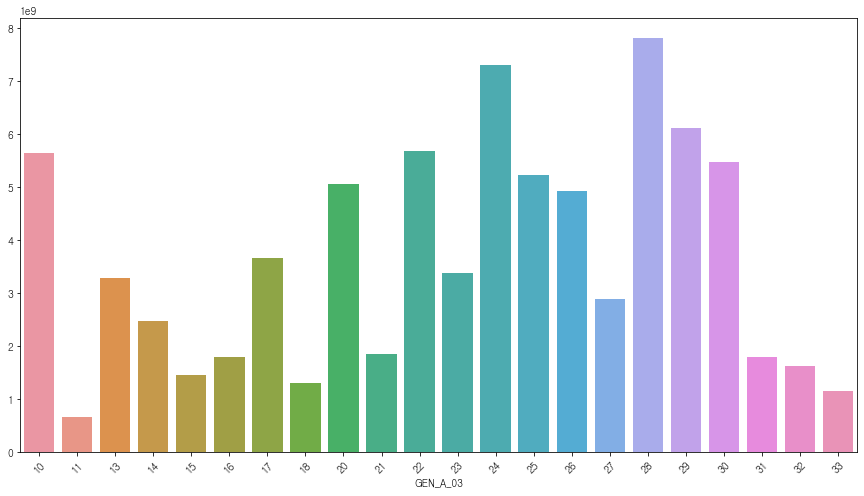

In [9]:
make_sum_plot(gen_ae, 'GEN_A_03','sum','GEN_E_01')

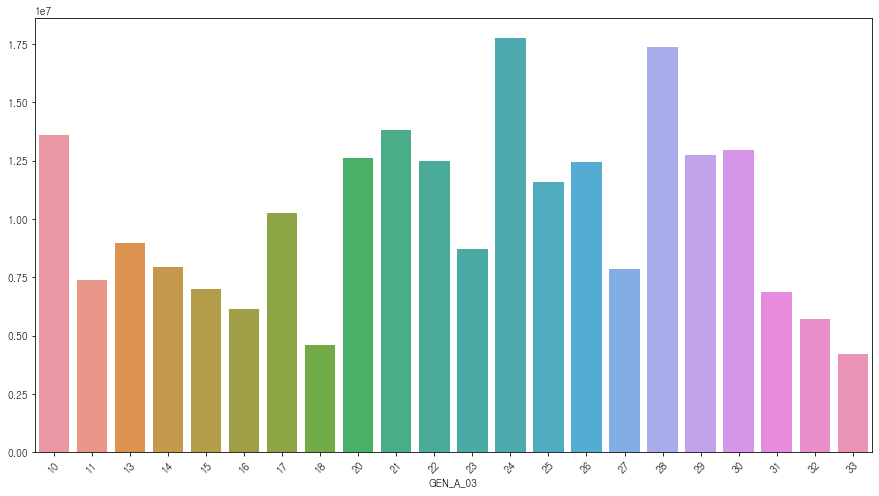

In [10]:
make_sum_plot(gen_ae, 'GEN_A_03','mean','GEN_E_01')

제조업의 매출총액 평균, 총합 비교
+ 누적 매출 : 28,24,29,22,10,30,20,17,13
+ 평균 매출 : 24,28,21,10,20,22,29,30,17,13

-> 지역별로 차이가 존재?

In [25]:
town_list = gen_ae['GEN_A_01'].unique()

In [26]:
def town_gb(data,group_by,what,see):
    if what == 'sum':
        for i in town_list:
            data = data[data['GEN_A_01'] == i]
            data_1 = data.groupy([group_by]).sum()[see]
            plt.figure(figsize=(15,8))
            sns.barplot(x =data_1.index,y=data_1.values,data = data_1)
            plt.xticks(rotation=45)
            plt.show()
        


In [27]:
town_gb(gen_ae,'GEN_A_03','sum,','GEN_E_01')